In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import path
os.chdir('..')
import pandas as pd
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader

In [3]:
available = ['ISIC_0052212','ISIC_0068279','ISIC_0076262']
df = pd.read_csv('./data/labels/train.csv')
df = df[df.image_name.isin(available)]
df.to_csv('./data/labels/sandbox.csv')
#pd.read_csv('../data/labels/sandbox.csv')

In [38]:
from model.data import MelanomaDataset
from model import model as model_pkg

In [65]:
imgs_dir = path.normpath(path.join(os.getcwd(),'data/jpeg/train'))
csv_path = path.normpath(path.join(os.getcwd(),'data/labels/sandbox.csv'))
mds = MelanomaDataset(imgs_dir=imgs_dir, label_csv = csv_path, train = True)
mdl = DataLoader(mds, batch_size = 3, shuffle=True)
model = model_pkg.MelanomaNet()

In [66]:
for i, batch in enumerate(mdl):
    x, y = batch
    a = model.intro(x)

In [67]:
a.shape

torch.Size([3, 64, 120, 120])

----------------------
label:  [0]


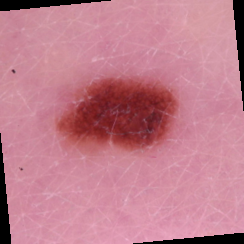

In [50]:
mds.display_sample(0)

In [52]:
mds[0]

0


(tensor([[[0.8039, 0.8000, 0.8000,  ..., 0.8588, 0.8510, 0.8471],
          [0.8039, 0.8039, 0.8039,  ..., 0.8627, 0.8510, 0.8471],
          [0.8078, 0.8118, 0.8118,  ..., 0.8627, 0.8471, 0.8392],
          ...,
          [0.7569, 0.7490, 0.7412,  ..., 0.8000, 0.8000, 0.8157],
          [0.7686, 0.7569, 0.7490,  ..., 0.8078, 0.8039, 0.8196],
          [0.7647, 0.7529, 0.7490,  ..., 0.8235, 0.8235, 0.8235]],
 
         [[0.5255, 0.5137, 0.5176,  ..., 0.5765, 0.5686, 0.5647],
          [0.5294, 0.5216, 0.5216,  ..., 0.5843, 0.5686, 0.5647],
          [0.5294, 0.5255, 0.5294,  ..., 0.5843, 0.5647, 0.5608],
          ...,
          [0.4980, 0.4902, 0.4824,  ..., 0.5647, 0.5608, 0.5804],
          [0.5098, 0.4980, 0.4902,  ..., 0.5725, 0.5686, 0.5804],
          [0.5059, 0.4941, 0.4902,  ..., 0.5922, 0.5922, 0.5843]],
 
         [[0.6157, 0.6118, 0.6118,  ..., 0.6824, 0.6745, 0.6706],
          [0.6196, 0.6157, 0.6157,  ..., 0.6863, 0.6745, 0.6706],
          [0.6196, 0.6235, 0.6275,  ...,